1. Read the file in pandas and create 3 data frames; one for each
2. Remove any data that is not read correctly (you may have to figure out which ones are..)
3. Convert the interval column to minutes
4. Compare the three data frames by date; that's find the average for unique dates from each data frame then compare graphically the three-This one is a little hard one, but give it your best shot.

In [1]:
import pandas as pd
castle = pd.read_excel('./project3data.xlsx', sheet_name=0)
daisy = pd.read_excel('./project3data.xlsx', sheet_name=1)
grand = pd.read_excel('./project3data.xlsx', sheet_name=2)

In [2]:
castle = castle[['Date', 'Time', 'Interval']]
daisy = daisy[['Date', 'Time', 'Interval']]
grand = grand[['Date', 'Time', 'Interval']]

In [3]:
castle.head()

,Date,Time,Interval
0,1905-07-01,Castle,Geyser
1,NaT,2011,Castle
2,2004-07-07,17:00:31,1110:06:31
3,2004-12-05,15:00:00,872:37:00
4,1999-06-16,09:52:00,787:59:00


In [24]:
from datetime import time
def clean_sheet(df):
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce').dt.date
    df['Time'] = pd.to_datetime(df['Time'],format= '%H:%M:%S', errors='coerce').dt.time
    df['Interval'] = pd.to_timedelta(df['Interval'], errors='coerce')
    df['interval_minutes'] = pd.to_numeric(df['Interval'].dt.seconds / 60)
    return df.dropna()

castle = clean_sheet(castle)
daisy = clean_sheet(daisy)
grand = clean_sheet(grand)

In [46]:
intervals = [x[['Date', 'interval_minutes']] for x in [castle, daisy, grand]]
averaged = pd.concat(intervals)
averaged = averaged.groupby('Date', as_index=False).mean().reset_index()

In [47]:
castle['label'] = 'Castle'
daisy['label'] = 'Daisy'
grand['label'] = 'Grand'
averaged['label'] = 'Average'

In [48]:
combined = pd.concat([castle, daisy, grand, averaged])[['Date', 'interval_minutes', 'label']]

In [49]:
(combined['Date'].min(),
combined['Date'].max(), len(combined['Date']))

(datetime.date(1997, 9, 5), datetime.date(2011, 8, 17), 66195)

In [50]:
combined['label']

2        Castle
3        Castle
4        Castle
5        Castle
6        Castle
         ...   
4486    Average
4487    Average
4488    Average
4489    Average
4490    Average
Name: label, Length: 66195, dtype: object

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

combined['Date'] = pd.to_datetime(combined['Date'])  # Convert to datetime if necessary
combined['interval_minutes'] = pd.to_numeric(combined['interval_minutes'], errors='coerce')

combined = combined.dropna(subset=['interval_minutes'])

df_resampled = combined.groupby('label').resample('W', on='Date').mean().reset_index()

This is the same data as at the bottom, but grouped by weeks to be a bit clearer. There's just too much data across too large a time frame to understand the individual data points otherwise.


Text(0, 0.5, 'Interval (minutes)')

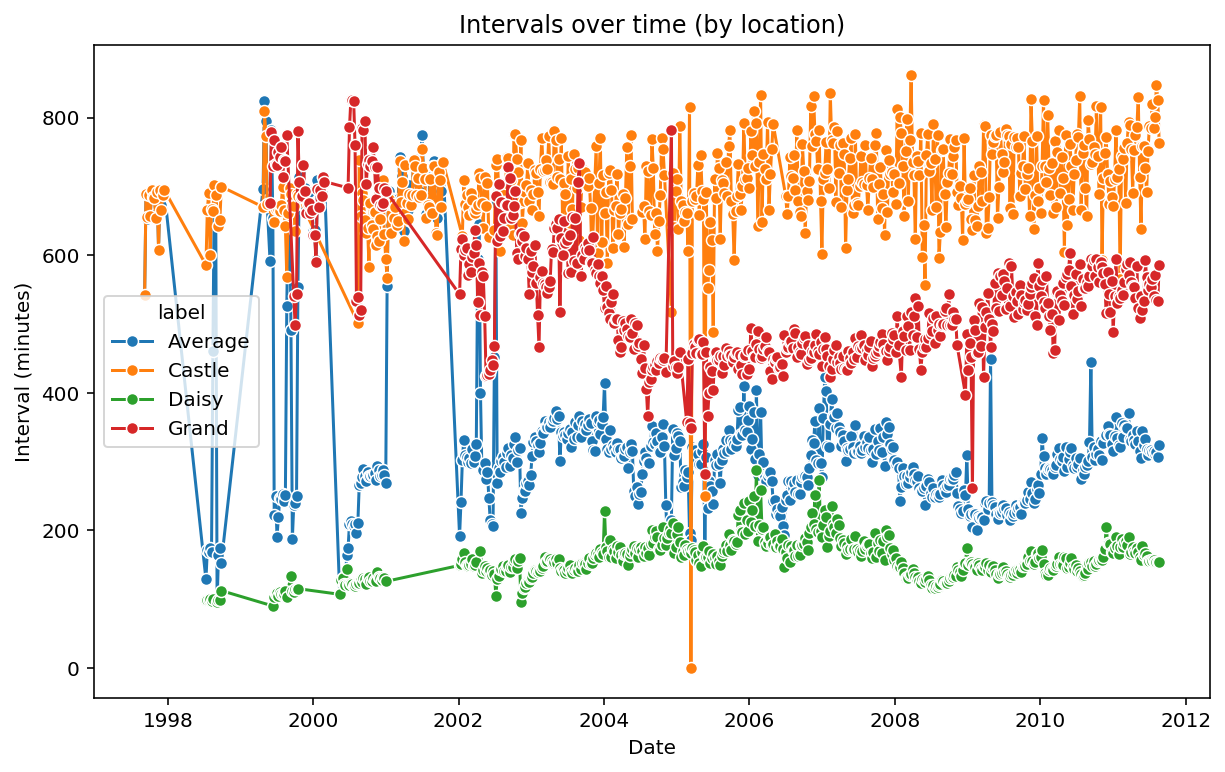

In [52]:

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='interval_minutes', hue='label', data=df_resampled, marker="o")

# Add titles and labels
plt.title('Intervals over time (by location)')
plt.xlabel('Date')
plt.ylabel('Interval (minutes)')

Text(0, 0.5, 'Interval (minutes)')

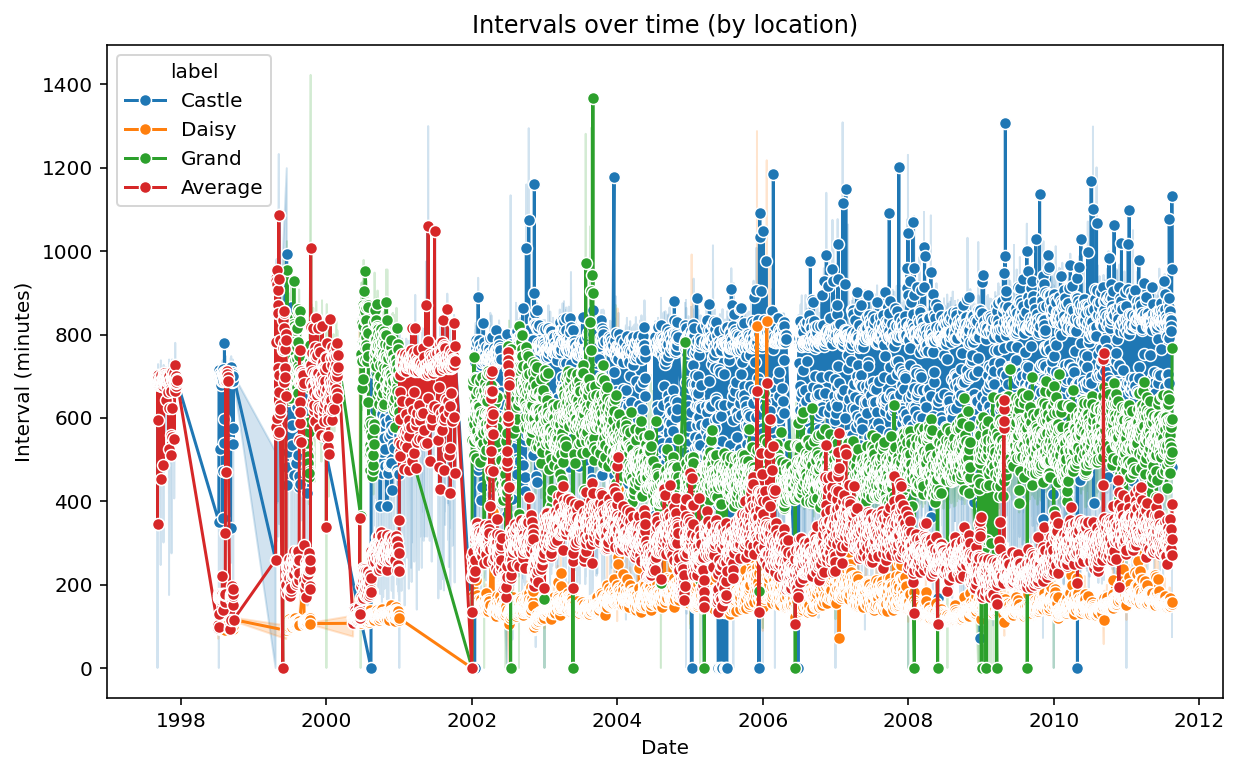

In [53]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='interval_minutes', hue='label', data=combined, marker="o")

# Add titles and labels
plt.title('Intervals over time (by location)')
plt.xlabel('Date')
plt.ylabel('Interval (minutes)')